In [19]:
# imports
import pandas as pd
import joblib
import optuna
from optuna import Trial, visualization
import plotly
import math
import seaborn as sns

In [5]:
# read data
train = pd.read_csv("../inputs/train_folds.csv")

In [6]:
# Sturges' rule to bin target variable
1 + int(math.log(train.shape[0],2))

19

In [22]:
# Bin it
bin_count = 2
train['bins'] = pd.qcut(train.target, bin_count, labels=False)
train.groupby("bins", as_index=False).agg({'target': ['min', 'max','count']})

bins    target                   
             min        max   count
0    0  0.000000   7.940565  150000
1    1  7.940576  10.267569  150000

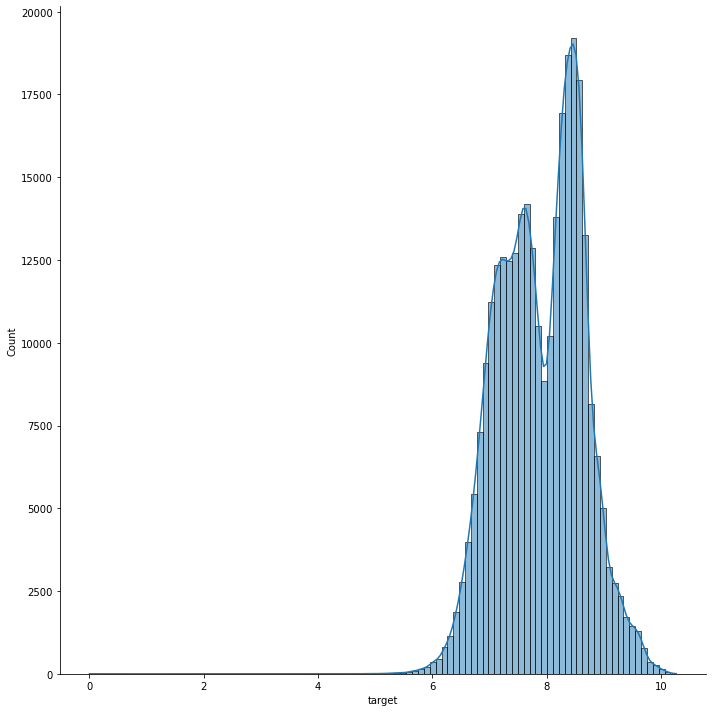

In [23]:
# visualize
sns.displot(train, x="target", bins=100, kde=True, height = 10)

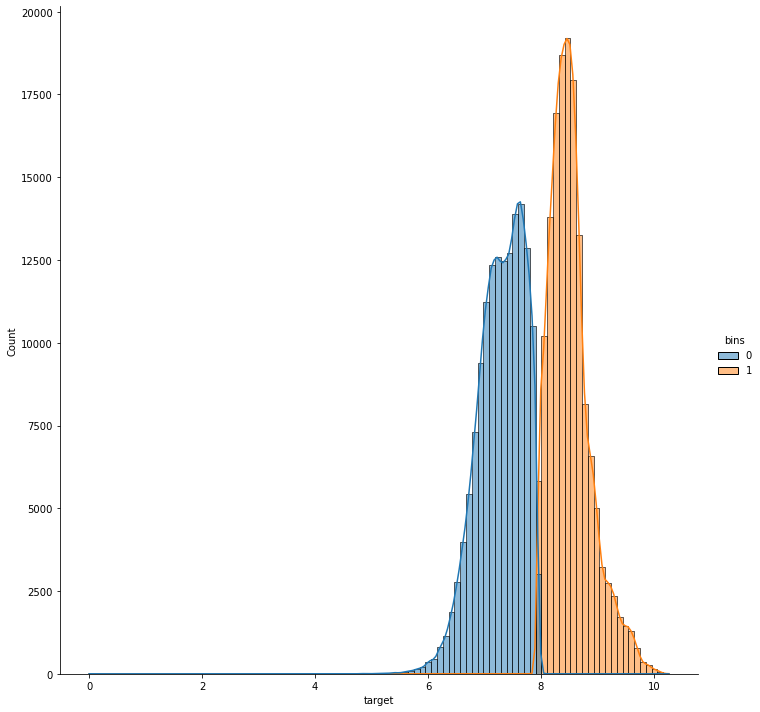

In [24]:
# visualize by bin
sns.displot(train, x="target", hue = 'bins', bins=100, kde=True, height = 10)

In [3]:
# view data
train.head(2)

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target,kfold
0,57348,0.48304,0.420289,0.418021,0.443441,0.281142,0.355079,0.526795,0.539485,0.491896,0.379660,0.276498,0.311546,0.289783,0.347652,8.687497,0
1,321045,0.44957,0.289416,0.288387,0.273547,0.282645,0.434354,0.292902,0.282978,0.185660,0.495884,0.486860,0.191516,0.321713,0.829566,7.150092,0


In [5]:
# add a dummy cat variable
train['dummy'] = 'dummy'

In [6]:
# see data types of columns
train.dtypes

id          int64
cont1     float64
cont2     float64
cont3     float64
cont4     float64
cont5     float64
cont6     float64
cont7     float64
cont8     float64
cont9     float64
cont10    float64
cont11    float64
cont12    float64
cont13    float64
cont14    float64
target    float64
kfold       int64
dummy      object
dtype: object

In [12]:
# get numeric fields
train.select_dtypes(include = 'number').columns.tolist()

['id',
 'cont1',
 'cont2',
 'cont3',
 'cont4',
 'cont5',
 'cont6',
 'cont7',
 'cont8',
 'cont9',
 'cont10',
 'cont11',
 'cont12',
 'cont13',
 'cont14',
 'target',
 'kfold']

In [13]:
# get categorical fields
train.select_dtypes(exclude = 'number').columns.tolist()

['dummy']

In [21]:
# check sample submission field datatype
ss = pd.read_csv('../inputs/sample_submission.csv')
ss.dtypes

id          int64
target    float64
dtype: object

In [23]:
# check submission field datatype
ss = pd.read_csv('../models/lightgbmregressor_submission.csv')
ss.dtypes

id          int64
target    float64
dtype: object

In [6]:
# best params from optuna
study = joblib.load('../models/hyperparametertuning_study.pkl')

In [7]:
# best params
study.best_params

{'n_estimators': 4000,
 'min_data_per_group': 80,
 'num_leaves': 256,
 'learning_rate': 0.005014752358883629,
 'min_data_in_leaf': 200}

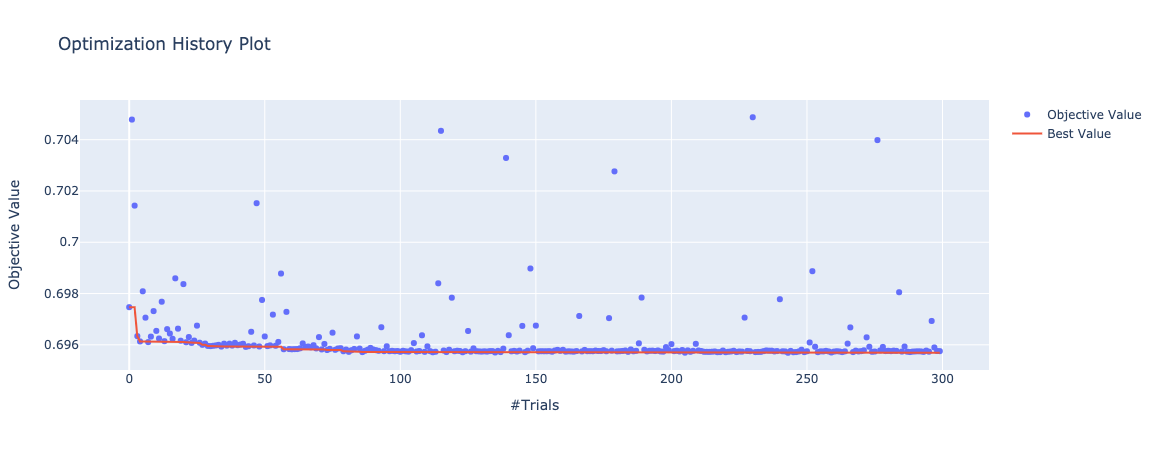

In [8]:
# visulaize the trials and their outcome
visualization.plot_optimization_history(study)

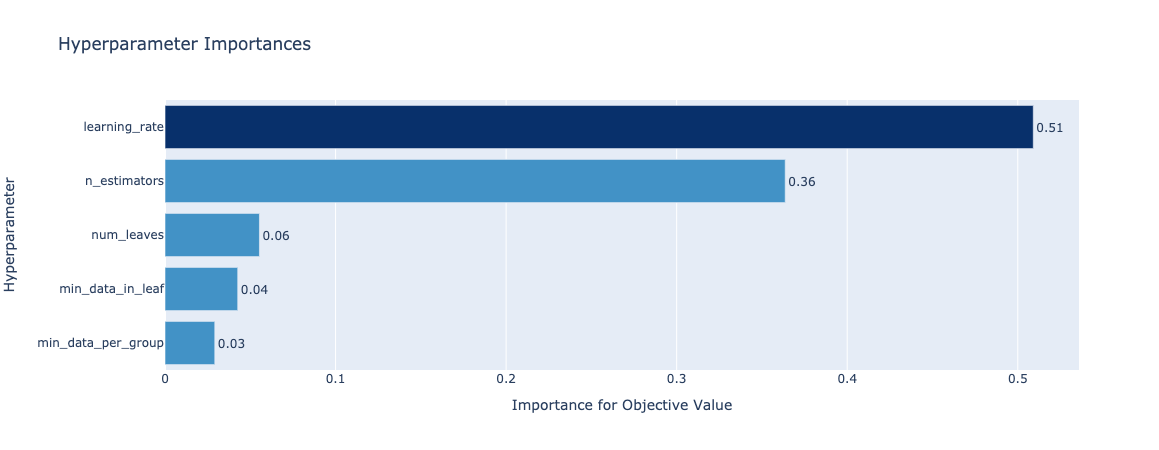

In [9]:
visualization.plot_param_importances(study)